# DSCI 100 Final Project Report

## Introduction and Question

## Data Loading

In [56]:
library(tidyverse)
library(tidymodels)
set.seed(31)
players_url <- "https://raw.githubusercontent.com/RainyDayyyyys/DSCI-100-Final-Project/refs/heads/main/players%20(1).csv"
sessions_url <- "https://raw.githubusercontent.com/RainyDayyyyys/DSCI-100-Final-Project/refs/heads/main/sessions%20(1).csv"
players <- read_csv(players_url)
sessions <- read_csv(sessions_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Summary Statistics and Exploratory Data Analysis

In [57]:
head(players)
nrow(players)

experience <- players |>
    group_by(experience) |>
    summarize(count = n())
experience

gender <- players |>
    group_by(gender) |>
    summarize(count = n())
gender

subscription <- players |>
    group_by(subscribe) |>
    summarize(count = n())
subscription

mean_values <- players |>
    summarize(mean_played_hours = mean(played_hours),  mean_age = mean(Age, na.rm = TRUE))
mean_values

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


[1] 196

experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


The players data set inlucdes (type in brackets):

Players' experience (character)
Subcription status (logical)
Players' hashed email (character)
Hours played (double)
Players' name (character)
Players' gender (character)
Players' age (double)
This dataset contains 196 observations and is tidy. One problem with the dataset is that the subcription status of players are of logical data type, so when performing a data analysis, this column needs to be changed into a factor data type. A potential issue with how the data is collected is that people may have lied about their data during the collection process.

Summary statistics of player experience, gender, and subscription status is shown in the tables above.

The mean value of all players' average hours played is 5.84, while the mean age is 20.52.

In [58]:
head(sessions)
nrow(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


[1] 1535

The sessions data set includes (type in brackets):

Players' hashed email (character)
Players' start time of each play session (character)
Players' end time of each play session (character)
Original start time (double)
Original end time (double)
This data set contains 1535 observations. This data set is not tidy because in the start and end time columns, each cell contains two "varaibles", which are the date and time. However, I will not be using this data set, thus, tidying this data is irrelevant to answering my question.

## Data Exploration Visualizations

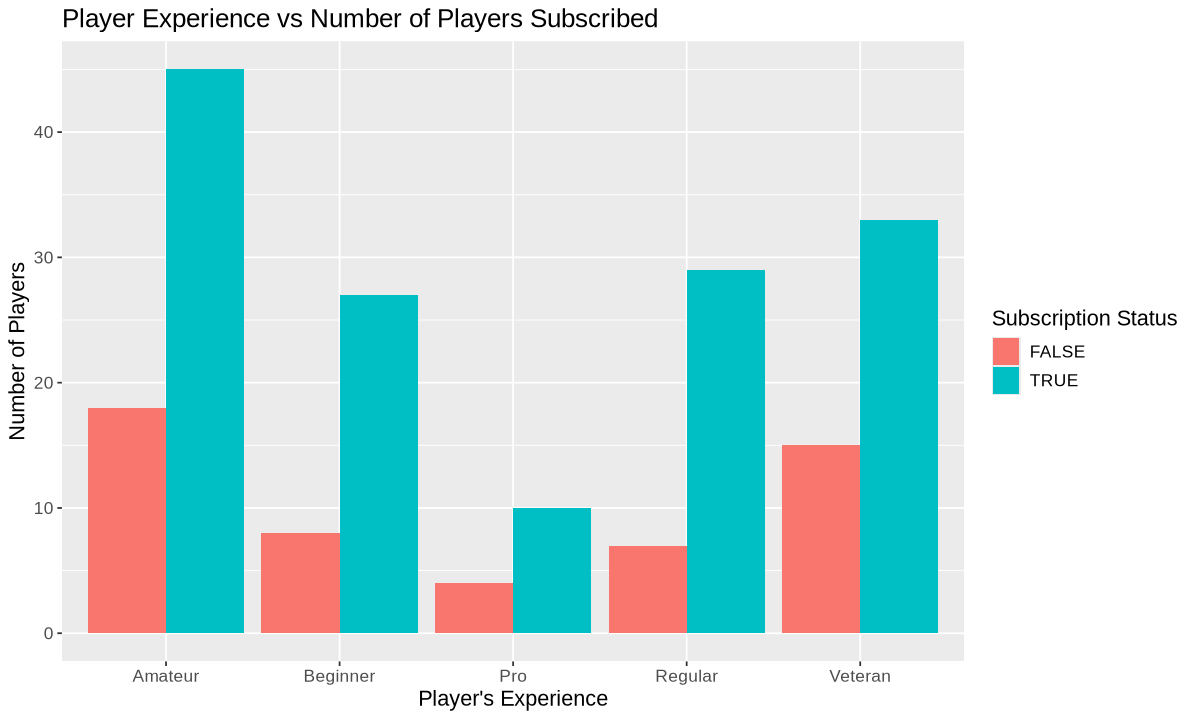

In [59]:
options(repr.plot.height = 6, repr.plot.width = 10)
experience_vs_subscribe <- players |>
    ggplot(aes(x = experience, fill = factor(subscribe))) +
    geom_bar(position = "dodge") +
    labs(title = "Player Experience vs Number of Players Subscribed", 
         x = "Player's Experience", 
         y = "Number of Players", 
         fill = "Subscription Status") +
    theme(text = element_text(size = 13))
experience_vs_subscribe

The plot above shows the relative distributions of the number of players (not) subscribed to a game letter based on player experience. It seems that amateur players have the highest number of subscriptions, while pro players have the least number of subscriptions.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


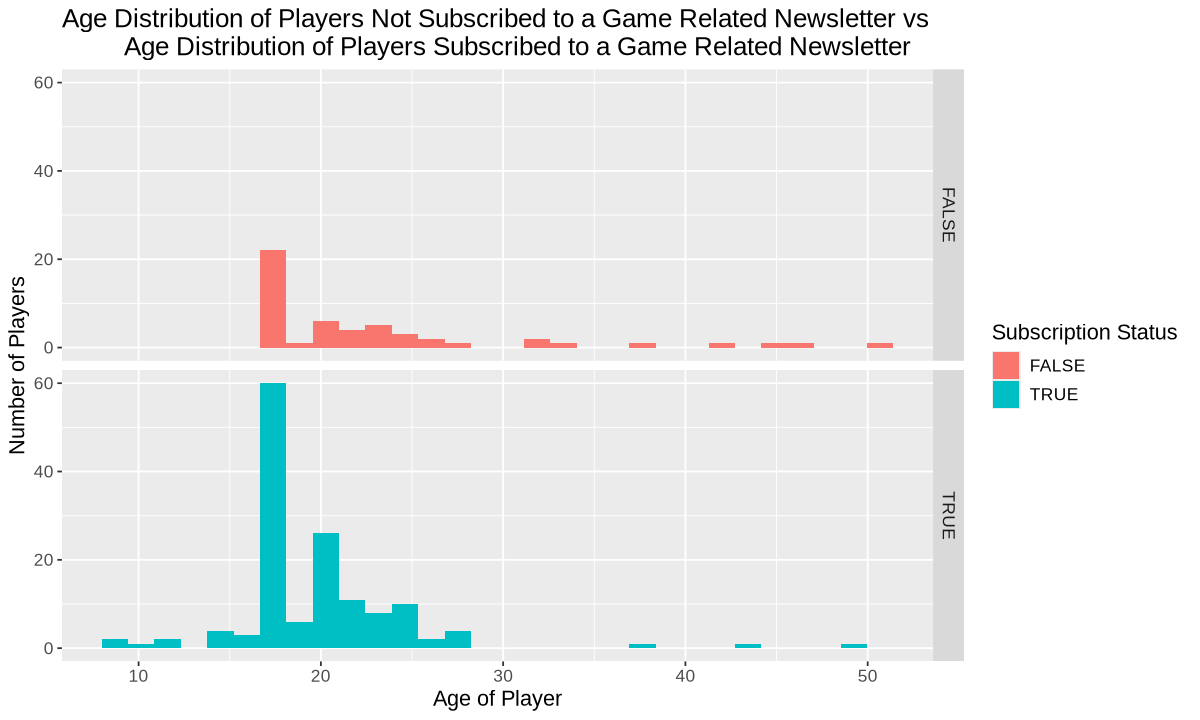

In [60]:
age_vs_subscription <- players|> 
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram() +
    facet_grid(rows = vars(subscribe)) +
    labs(title = "Age Distribution of Players Not Subscribed to a Game Related Newsletter vs
         Age Distribution of Players Subscribed to a Game Related Newsletter", 
         x = "Age of Player",
         y = "Number of Players",
         fill = "Subscription Status") +
    theme(text = element_text(size = 13))
age_vs_subscription


The plot above demonstrates the distributions of age and (no) subscription numbers of players. It seems that players around 17 years old have the highest numbers of subscriptions to a game letter.

## Methods and Plan

I will be using KNN classification with explanatory variables experience and played_hours to predict the response variable subscribe. Since the reponse variable subscribe is a class, a classfication model would work best compared to the regression models. The model assumes that the data collected is truthful, and limitations of the model include not being able to include other explanatory variables like gender. The original data set will be split into a training(70% of original data) and a testing(30% of original data) set, and a 5-fold cross validation will be performed with the training set to determine the best k-value to be employed. The model will then be used to make predictions on the testing set, and its performance will be collected to determine how good of a classification model it is.

## Data Analysis

In [61]:
players <- players |>
    select(subscribe, Age, experience) |>
    mutate(subscribe = as_factor(subscribe)) |>
    mutate(experience = fct_recode(experience, "1" = "Amateur", "2" = "Beginner", "3" = "Pro", "4" = "Regular", "5" = "Veteran")) |>
    mutate(experience = as.numeric(experience))

players

subscribe,Age,experience
<fct>,<dbl>,<dbl>
TRUE,9,3
TRUE,17,5
FALSE,17,5
TRUE,21,1
TRUE,21,4
TRUE,17,1
TRUE,19,4
FALSE,21,1
TRUE,17,1


## Data Analysis

In [68]:
# Finding best K-value
players_split <- initial_split(players, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(subscribe ~ Age + experience, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

players_vfold_50 <- vfold_cv(players_train, v = 5, strata = subscribe)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold_50, grid = k_vals) |>
  collect_metrics()

knn_results

accuracies <- knn_results |>
  filter(.metric == "accuracy")

accuracies

best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

There were issues with some computations   A: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4450944,4,0.018162984,Preprocessor1_Model01
1,roc_auc,binary,0.5004058,4,0.016451944,Preprocessor1_Model01
6,accuracy,binary,0.6236043,4,0.041902839,Preprocessor1_Model02
6,roc_auc,binary,0.5833092,4,0.032661469,Preprocessor1_Model02
11,accuracy,binary,0.7268678,4,0.010433251,Preprocessor1_Model03
11,roc_auc,binary,0.5933248,4,0.037541416,Preprocessor1_Model03
16,accuracy,binary,0.7003900,4,0.011820540,Preprocessor1_Model04
16,roc_auc,binary,0.5613839,4,0.061788020,Preprocessor1_Model04
21,accuracy,binary,0.7352011,4,0.005388091,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4450944,4,0.018162984,Preprocessor1_Model01
6,accuracy,binary,0.6236043,4,0.041902839,Preprocessor1_Model02
11,accuracy,binary,0.7268678,4,0.010433251,Preprocessor1_Model03
16,accuracy,binary,0.7003900,4,0.011820540,Preprocessor1_Model04
21,accuracy,binary,0.7352011,4,0.005388091,Preprocessor1_Model05
26,accuracy,binary,0.7352011,4,0.005388091,Preprocessor1_Model06
31,accuracy,binary,0.7352011,4,0.005388091,Preprocessor1_Model07
36,accuracy,binary,0.7352011,4,0.005388091,Preprocessor1_Model08
41,accuracy,binary,0.7352011,4,0.005388091,Preprocessor1_Model09


[1] 21

In [69]:
# Predictions
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2808219
Best kernel: rectangular
Best k: 21

In [74]:
players_test_predictions <- predict(knn_fit, players_test) |>
    bind_cols(players_test)
players_test_predictions

ERROR: [1m[33mError[39m in `bind_cols()`:[22m
[33m![39m Can't recycle `..1` (size 48) to match `..2` (size 49).
